# 8. FX explanation of non-PPP-adjusted relationship

In [1]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import os

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
log_cols = ['EI', 'EIb', 'EIc', 'EIl',
            'P_GDP', 'P_GDPb', 'P_GDPl', 
            'TI', 'FX', 'lagFX']

In [3]:
%get data_dir --from em-2020
%get log_cols --from em-2020
suppressMessages({
library(data.table)
library(dplyr)
library(tseries)
library(plm)
library(feather)
library(forecast)
library(lavaan)
})
data.raw <- read.csv(file.path(data_dir, 'WB_BGD_current.csv'))
data.raw$lagFX <- shift(data.raw$FX, n=1, type='lag')

data.log <- copy(data.raw)
data.log[log_cols[log_cols != 'EIc']] <- log(data.raw[log_cols[log_cols != 'EIc']])

# data.logdiff <- diff(as.matrix(log(data.raw)))
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1991 & year <= 2014)
data.log <- subset(data.log, year >= 1991 & year <= 2014)
data.logdiff <- subset(data.logdiff, year >= 1991 & year <= 2014)

## P_GDP and EI are inversely related:

[1] -0.9008809


Call:
lm(formula = EI ~ P_GDP, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.056568 -0.010684  0.000512  0.009819  0.049400 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.021984   0.007371   2.983  0.00687 ** 
P_GDP       -0.929563   0.095490  -9.735 1.96e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02581 on 22 degrees of freedom
Multiple R-squared:  0.8116,	Adjusted R-squared:  0.803 
F-statistic: 94.76 on 1 and 22 DF,  p-value: 1.964e-09


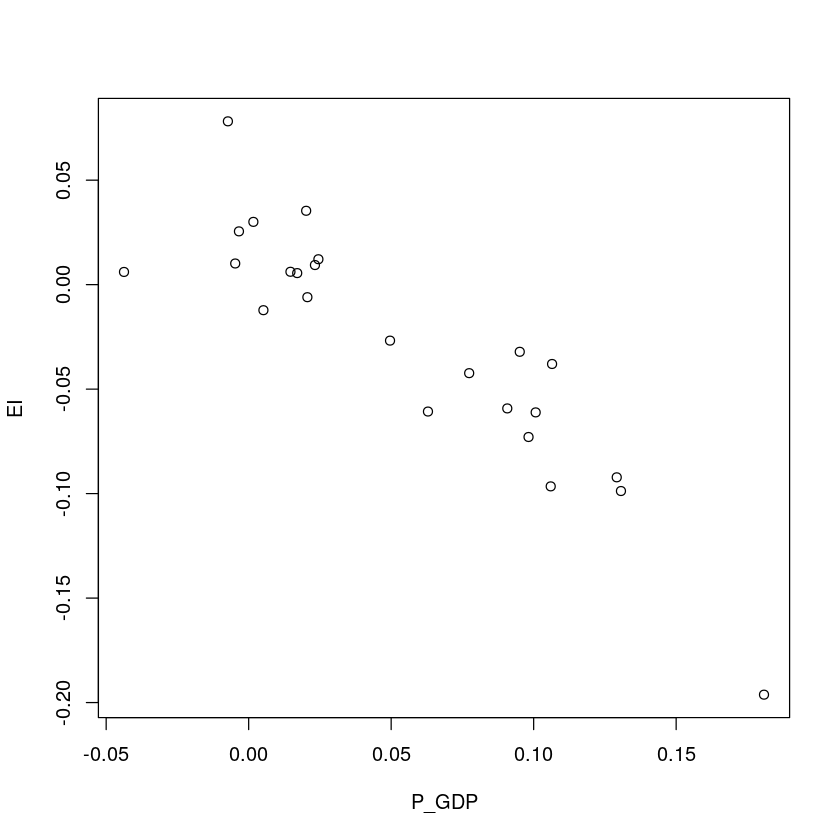

In [4]:
with(data.logdiff, {plot(P_GDP, EI); cor(P_GDP, EI, use="pairwise.complete.obs")})
summary(lm(EI ~ P_GDP, data=data.logdiff))

## but not with PPP-adjustment:

[1] -0.2582986


Call:
lm(formula = EIb ~ P_GDPb, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057386 -0.011963  0.002672  0.011632  0.046687 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.004676   0.020418  -0.229    0.821
P_GDPb      -0.448822   0.357888  -1.254    0.223

Residual standard error: 0.02482 on 22 degrees of freedom
Multiple R-squared:  0.06672,	Adjusted R-squared:  0.0243 
F-statistic: 1.573 on 1 and 22 DF,  p-value: 0.223


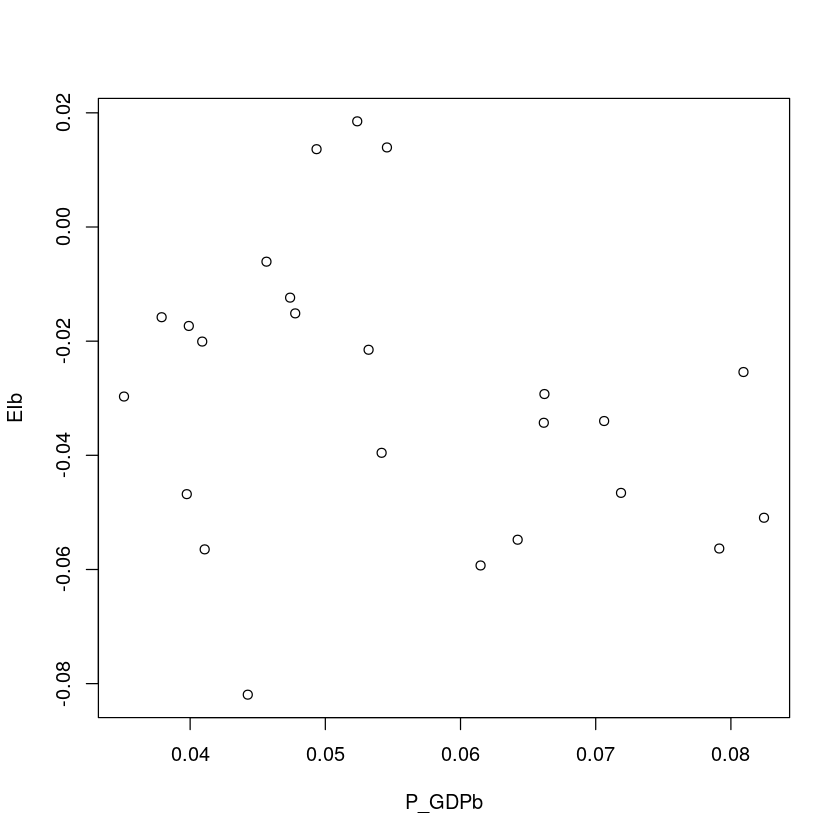

In [5]:
with(data.logdiff, {plot(P_GDPb, EIb); cor(P_GDPb, EIb, use="pairwise.complete.obs")})
summary(lm(EIb ~ P_GDPb, data=data.logdiff))

## and not in local currency:

[1] -0.05502463


Call:
lm(formula = EIl ~ P_GDPl, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.041870 -0.015138 -0.002205  0.013171  0.048950 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.005713   0.014183  -0.403    0.691
P_GDPl      -0.098789   0.382190  -0.258    0.798

Residual standard error: 0.02334 on 22 degrees of freedom
Multiple R-squared:  0.003028,	Adjusted R-squared:  -0.04229 
F-statistic: 0.06681 on 1 and 22 DF,  p-value: 0.7984


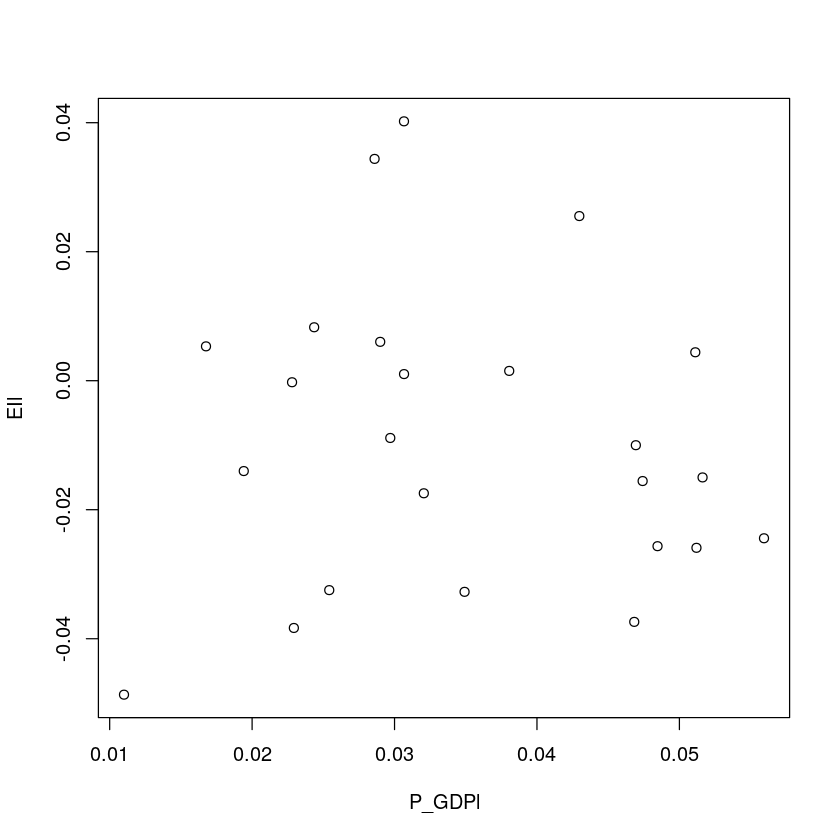

In [6]:
with(data.logdiff, {plot(P_GDPl, EIl); cor(P_GDPl, EIl, use="pairwise.complete.obs")})
summary(lm(EIl ~ P_GDPl, data=data.logdiff))

## but both are correlated with FX:

[1] -0.5656872

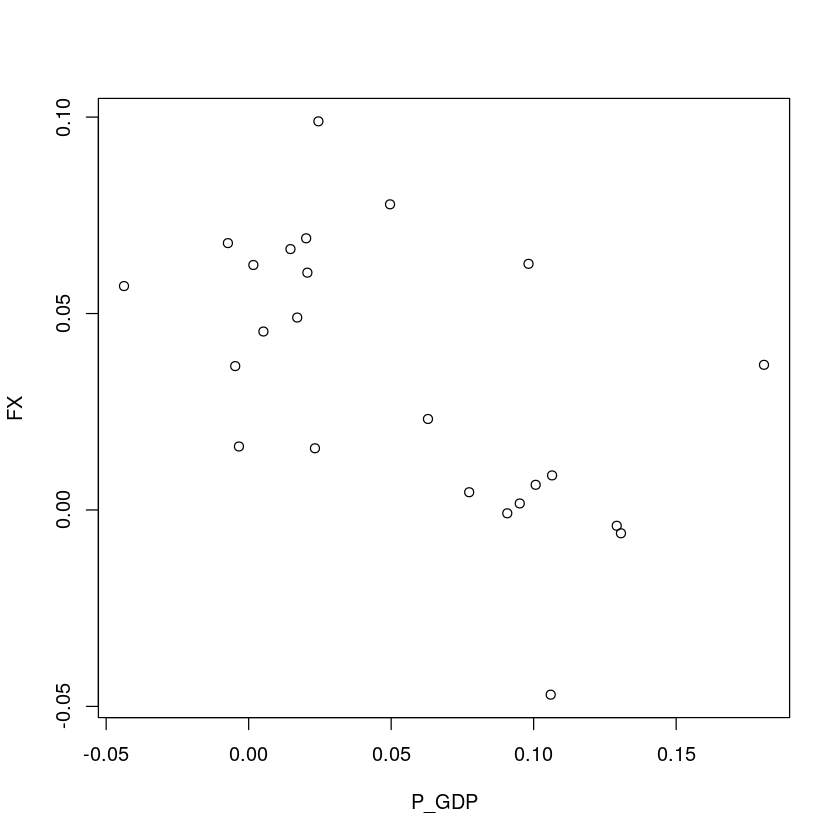

[1] 0.5161485

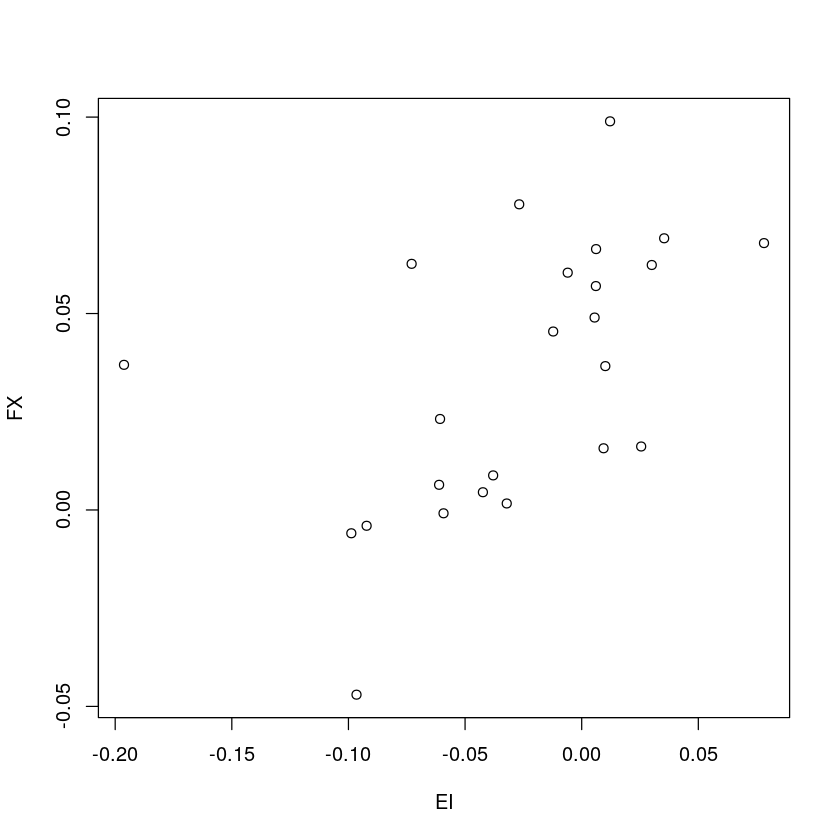

In [7]:
with(data.logdiff, {plot(P_GDP, FX); cor(P_GDP, FX, use="pairwise.complete.obs")})
with(data.logdiff, {plot(EI, FX); cor(EI, FX, use="pairwise.complete.obs")})

## coefficients of FX for both non-PPP-adjusted measures are significant:

In [8]:
ei.fx.lm <- lm(EI ~ FX, data=data.logdiff)
summary(ei.fx.lm)
pgdp.fx.lm <- lm(P_GDP ~ FX, data=data.logdiff)
summary(pgdp.fx.lm)


Call:
lm(formula = EI ~ FX, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.170819 -0.017885  0.005963  0.026069  0.076756 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.05736    0.01465  -3.916 0.000739 ***
FX           0.86505    0.30604   2.827 0.009824 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05093 on 22 degrees of freedom
Multiple R-squared:  0.2664,	Adjusted R-squared:  0.2331 
F-statistic: 7.989 on 1 and 22 DF,  p-value: 0.009824



Call:
lm(formula = P_GDP ~ FX, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076338 -0.026970 -0.002344  0.029790  0.129808 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08496    0.01367   6.217 2.95e-06 ***
FX          -0.91882    0.28556  -3.218  0.00396 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04752 on 22 degrees of freedom
Multiple R-squared:   0.32,	Adjusted R-squared:  0.2891 
F-statistic: 10.35 on 1 and 22 DF,  p-value: 0.003964


## even out to one lag:

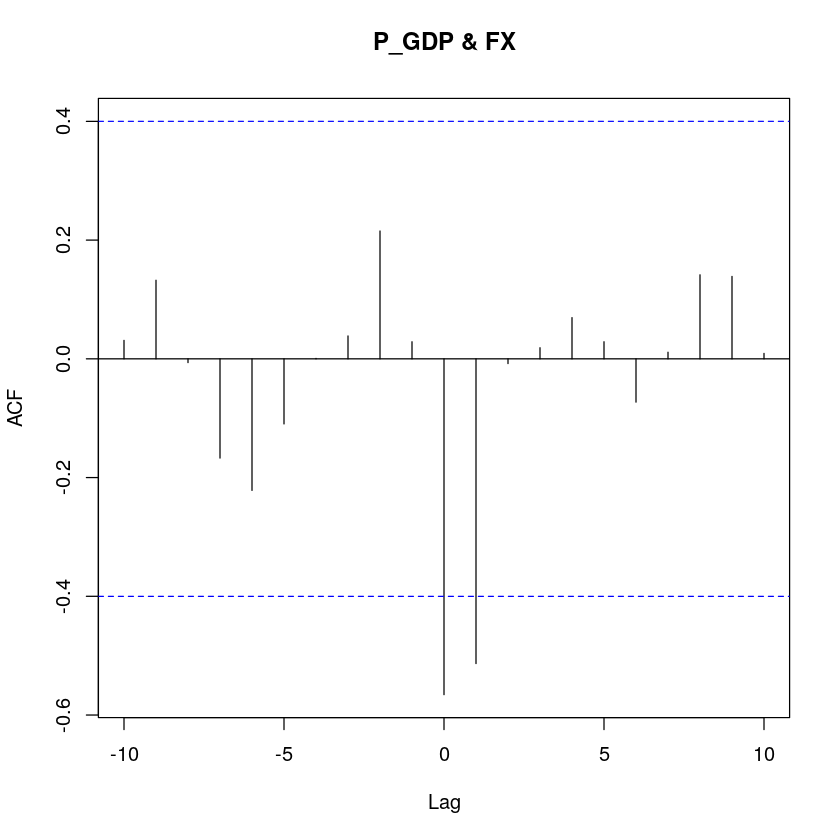

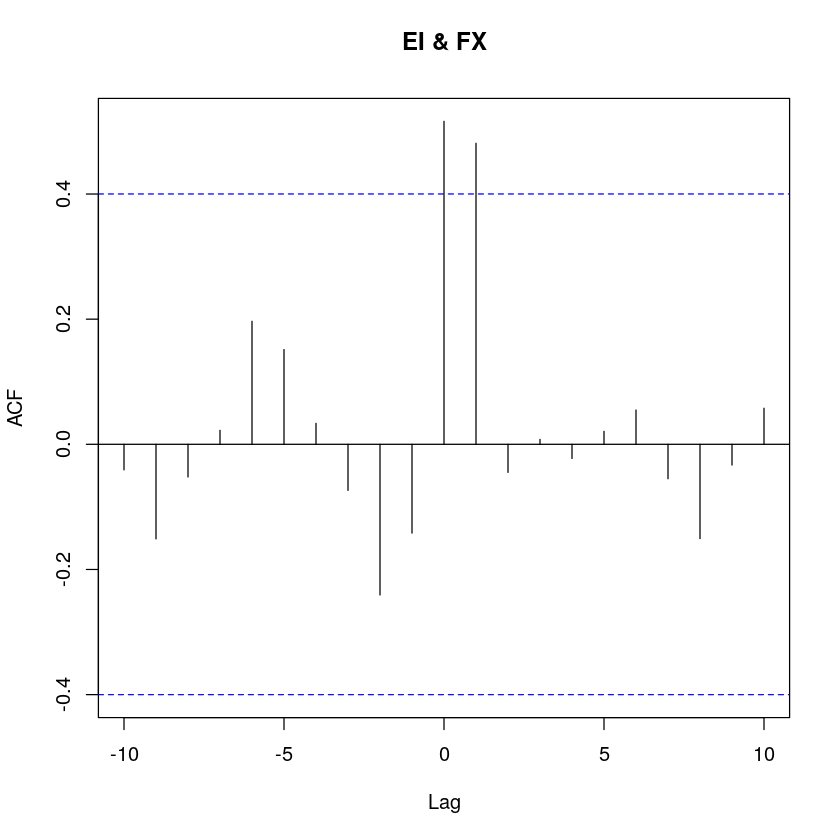

In [9]:
with (data.logdiff, ccf(P_GDP, FX))
with (data.logdiff, ccf(EI, FX))

In [10]:
ei.fx.lm <- lm(EI ~ FX + lagFX, data=data.logdiff)
summary(ei.fx.lm)
pgdp.fx.lm <- lm(P_GDP ~ FX + lagFX, data=data.logdiff)
summary(pgdp.fx.lm)


Call:
lm(formula = EI ~ FX + lagFX, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.145482 -0.014905  0.004654  0.023088  0.081011 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07802    0.01563  -4.990 6.13e-05 ***
FX           0.70669    0.28321   2.495   0.0210 *  
lagFX        0.70578    0.28619   2.466   0.0224 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0459 on 21 degrees of freedom
Multiple R-squared:  0.4312,	Adjusted R-squared:  0.377 
F-statistic: 7.958 on 2 and 21 DF,  p-value: 0.002676



Call:
lm(formula = P_GDP ~ FX + lagFX, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.087425 -0.021137 -0.005924  0.019166  0.100771 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10863    0.01347   8.065 7.24e-08 ***
FX          -0.73733    0.24402  -3.022  0.00649 ** 
lagFX       -0.80885    0.24659  -3.280  0.00357 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03955 on 21 degrees of freedom
Multiple R-squared:  0.5504,	Adjusted R-squared:  0.5076 
F-statistic: 12.85 on 2 and 21 DF,  p-value: 0.0002264


## FX explains the residuals of the relationship between EI and P_GDPb:


Call:
lm(formula = EI ~ P_GDPb, data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17635 -0.03041  0.01114  0.02916  0.10465 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.00421    0.04839   0.087    0.931
P_GDPb      -0.58637    0.84811  -0.691    0.497

Residual standard error: 0.05882 on 22 degrees of freedom
Multiple R-squared:  0.02127,	Adjusted R-squared:  -0.02322 
F-statistic: 0.478 on 1 and 22 DF,  p-value: 0.4966


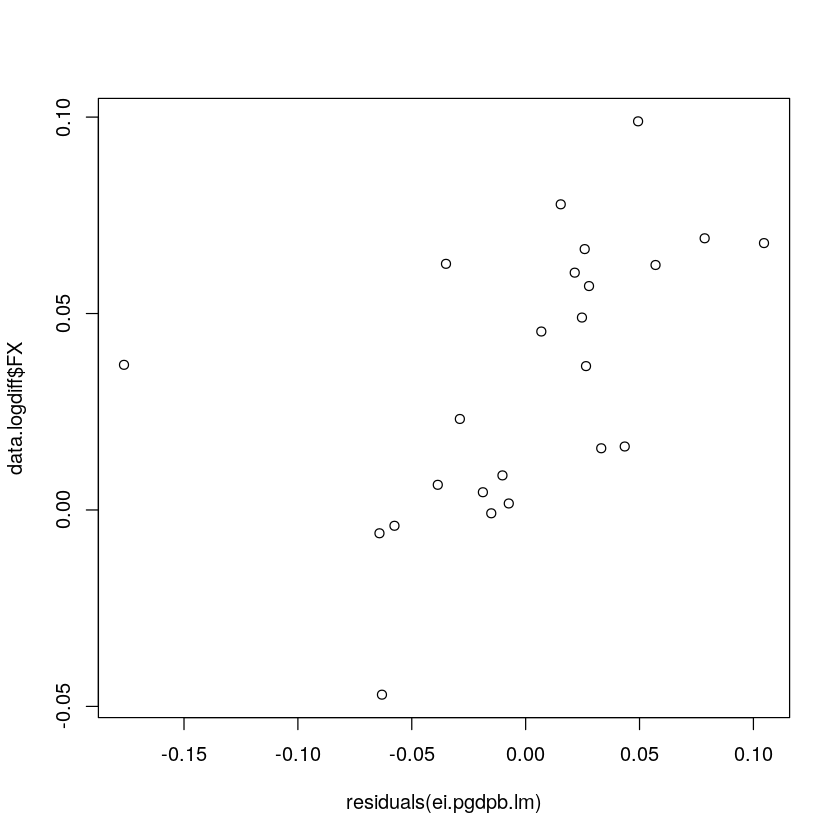

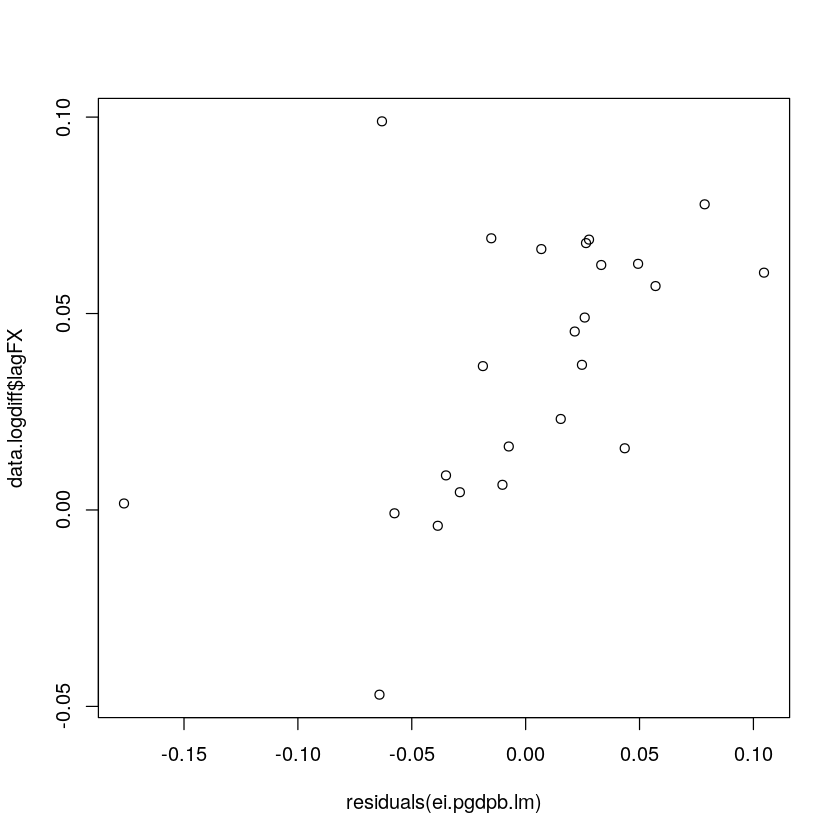

In [11]:
ei.pgdpb.lm <- lm(EI ~ P_GDPb, data=data.logdiff)
summary(ei.pgdpb.lm)
plot(residuals(ei.pgdpb.lm), data.logdiff$FX)
plot(residuals(ei.pgdpb.lm), data.logdiff$lagFX)

In [12]:
summary(lm(residuals(ei.pgdpb.lm) ~ data.logdiff$FX + data.logdiff$lagFX))


Call:
lm(formula = residuals(ei.pgdpb.lm) ~ data.logdiff$FX + data.logdiff$lagFX)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.153912 -0.011823  0.001913  0.023577  0.071003 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)        -0.05017    0.01524  -3.291  0.00348 **
data.logdiff$FX     0.71932    0.27617   2.605  0.01655 * 
data.logdiff$lagFX  0.70385    0.27907   2.522  0.01981 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04476 on 21 degrees of freedom
Multiple R-squared:  0.4473,	Adjusted R-squared:  0.3947 
F-statistic: 8.499 on 2 and 21 DF,  p-value: 0.001976


## ...but even after removing FX fluctuations, EI and P_GDP are related:
(in a way that EIb and P_GDPb are not)


Call:
lm(formula = residuals(ei.fx.lm) ~ residuals(pgdp.fx.lm), data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.056722 -0.010492 -0.001768  0.009727  0.049407 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.167e-18  5.255e-03   0.000        1    
residuals(pgdp.fx.lm) -9.503e-01  1.421e-01  -6.689    1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02574 on 22 degrees of freedom
Multiple R-squared:  0.6704,	Adjusted R-squared:  0.6554 
F-statistic: 44.75 on 1 and 22 DF,  p-value: 1.004e-06


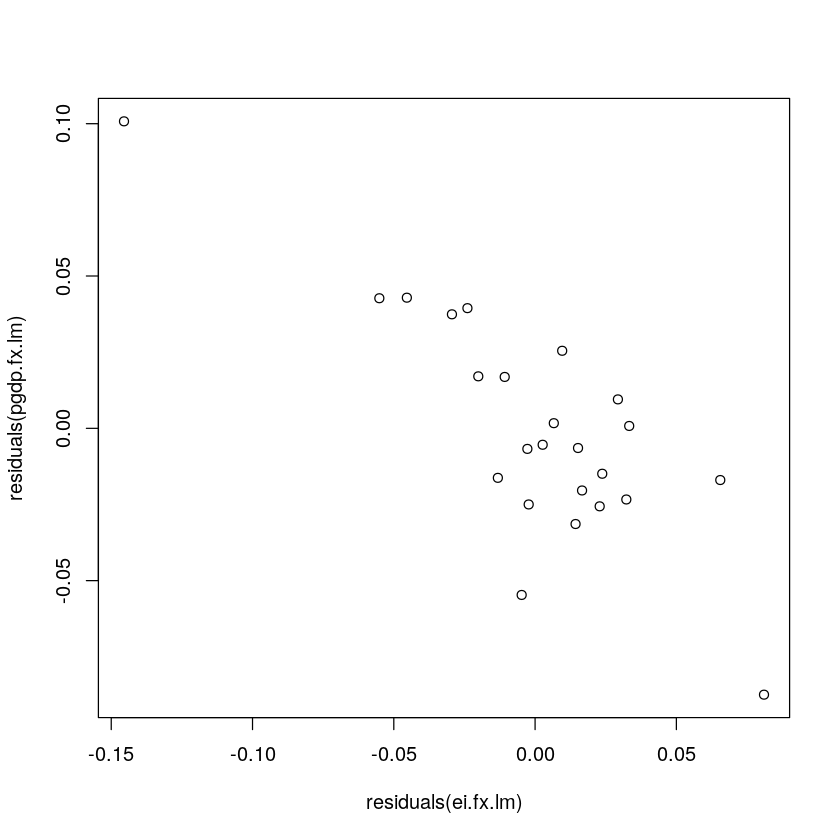

In [13]:
summary(lm(residuals(ei.fx.lm) ~ residuals(pgdp.fx.lm), data=data.logdiff))
plot(residuals(ei.fx.lm), residuals(pgdp.fx.lm))